# Obtaining and preparing the MNIST dataset 

#### The MNIST dataset is publicly available at http://yann.lecun.com/exdb/mnist/ and consists of the following four parts:

In [1]:
import os
import struct
import numpy as np
def load_mnist(path, kind='train'):
    """Load MNIST data from 'path'"""
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5) * 2
    return images, labels

In [2]:
path='C:\\Users\\Hossein\\Desktop\\aipython\\dataset\\MINIST'
X_train, y_train = load_mnist(path, kind='train')
print('Rows: %d, columns: %d'% (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [3]:
X_test, y_test = load_mnist(path, kind='t10k')
print('Rows: %d, columns: %d'% (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


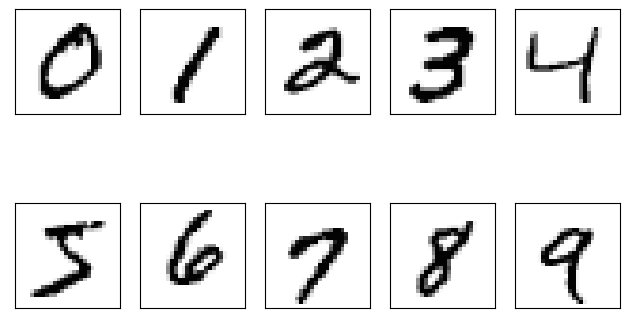

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5,sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
   img = X_train[y_train == i][0].reshape(28, 28)
   ax[i].imshow(img, cmap='Greys')
        
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

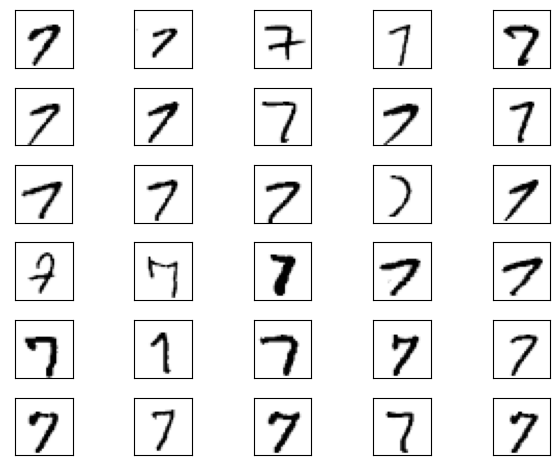

In [5]:
fig, ax = plt.subplots(nrows=6,ncols=5,sharex=True,sharey=True)
ax = ax.flatten()
for i in range(30):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
# X_train[y_train == 1][0].reshape(28, 28)

In [7]:
X_train.shape

(60000, 784)

In [9]:
import numpy as np
np.savez_compressed(path+'\\mnist_scaled.npz',X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test)

In [10]:
mnist = np.load(path+'\\mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [11]:
# X_train = mnist['X_train']
X_train, y_train, X_test, y_test = [mnist[f] for f in mnist.files]

## Loading MNIST using scikit-learn


In [13]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = ((X / 255.) - .5) * 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000,random_state=123, stratify=y)